In [ ]:
import keras
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import load_img,img_to_array
from keras.preprocessing import image
import requests
import numpy as np
from google.colab import files as FILE
import os
import pandas as pd
import pickle
import cv2 
from google.colab.patches import cv2_imshow
from skimage import feature
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from tqdm import tqdm

In [ ]:
train = pd.read_csv(r'/content/drive/MyDrive/Projet_TM/Projet_VA/kaggle/football_golden_foot.csv')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


In [ ]:
cd /content/drive/MyDrive/Projet_TM/Projet_VA

/content/drive/MyDrive/Projet_TM/Projet_VA


In [ ]:

train_image = []
for i in range(train.shape[0]):
    pa="/content/drive/MyDrive/Projet_TM/Projet_VA/kaggle/football_golden_foot/" + train["folder_name"][i] + "/" + train["filename"][i]
    photo= cv2.imread(pa)
    gray_img = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    if(len(faces)!=0):
        for (x,y,w,h) in faces:
            roi_gray = gray_img[y:y+h, x:x+w] 
        resized = cv2.resize(roi_gray, (128,128))
    else:
        resized = cv2.resize(gray_img, (128,128))    
    #resized = cv2.resize(gray_img, (128,128))
    lbp = feature.local_binary_pattern(resized, 8, 3, 'default')
    train_image.append(lbp)
    print(i)
X = np.array(train_image)

In [ ]:
Y=train['folder_name'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=random.seed(), test_size=0.2)

In [ ]:
#save the modele
filename = 'x.pkl'
pickle.dump(X, open(filename, 'wb'))

In [ ]:
#load th modele
filename = 'x.pkl'
X = pickle.load(open(filename, 'rb'))

In [ ]:
#Redimentioner
nsamples, nx, ny= X_train.shape
X_train = X_train.reshape((nsamples,nx*ny)) 
#X_train=np.matrix(X_train)

In [ ]:
##12min    ##train SVM
model=svm.SVC(kernel='linear',gamma='auto',probability=True)     
model.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [ ]:
#save the modele
filename = 'SvmModel3.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#load th modele
filename = 'SvmModel.pkl'
model = pickle.load(open(filename, 'rb'))

In [ ]:
#load th modele
filename = 'SvmModel1.pkl'
model = pickle.load(open(filename, 'rb'))

In [ ]:
nsamples, nx,ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny)) 

In [ ]:
#test accuracy
print(model.score(X_test,y_test))

0.6154381084840056


In [ ]:
############################### test one image with model 'SvmModel' ####################################
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

pa="image_name.jpg"
photo= cv2.imread(pa)
gray_img = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
faces = face_cascade.detectMultiScale(photo,1.3,5) #detection face
print(faces)
for (x,y,w,h) in faces:
      print("testtte")
      roi_gray = gray_img[y:y+h, x:x+w] 
resized = cv2.resize(roi_gray, (128,128))
lbp = feature.local_binary_pattern(resized, 8, 3, 'default') #extraction the feature by LBP

#redimentioner
nsamples, nx = lbp.shape
lbp = lbp.reshape(1,nsamples*nx) 


#one test-predict
print(model.predict(lbp))

()
['lionel_messi']


In [ ]:
############################### test one image with model  'SvmModel1' ####################################
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

pa="image_name.jpg"
photo= cv2.imread(pa)
gray_img = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
 
resized = cv2.resize(gray_img, (128,128))
lbp = feature.local_binary_pattern(resized, 8, 3, 'default') #extraction the feature by LBP

#redimentioner
nsamples, nx = lbp.shape
lbp = lbp.reshape(1,nsamples*nx) 


#one test-predict
print(model.predict(lbp))

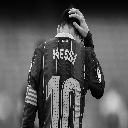

In [ ]:
cv2_imshow(resized)

In [ ]:
#test une image
url='https://i.eurosport.com/2021/05/17/3134648-64248688-2560-1440.jpg'
img_data = requests.get(url).content
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)
